<a href="https://colab.research.google.com/github/Prem-Subhash/Fundamental/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read the dataset
data = pd.read_csv("/content/WineQT.csv")
print(data.head())

# Preprocess
def discretizeOutput(y):
  for i in range(len(y)):
    if(y[i]<65):
      y[i] = 1
    else:
      y[i] = 0
  return y

# Separate features and target
y = data["quality"]


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


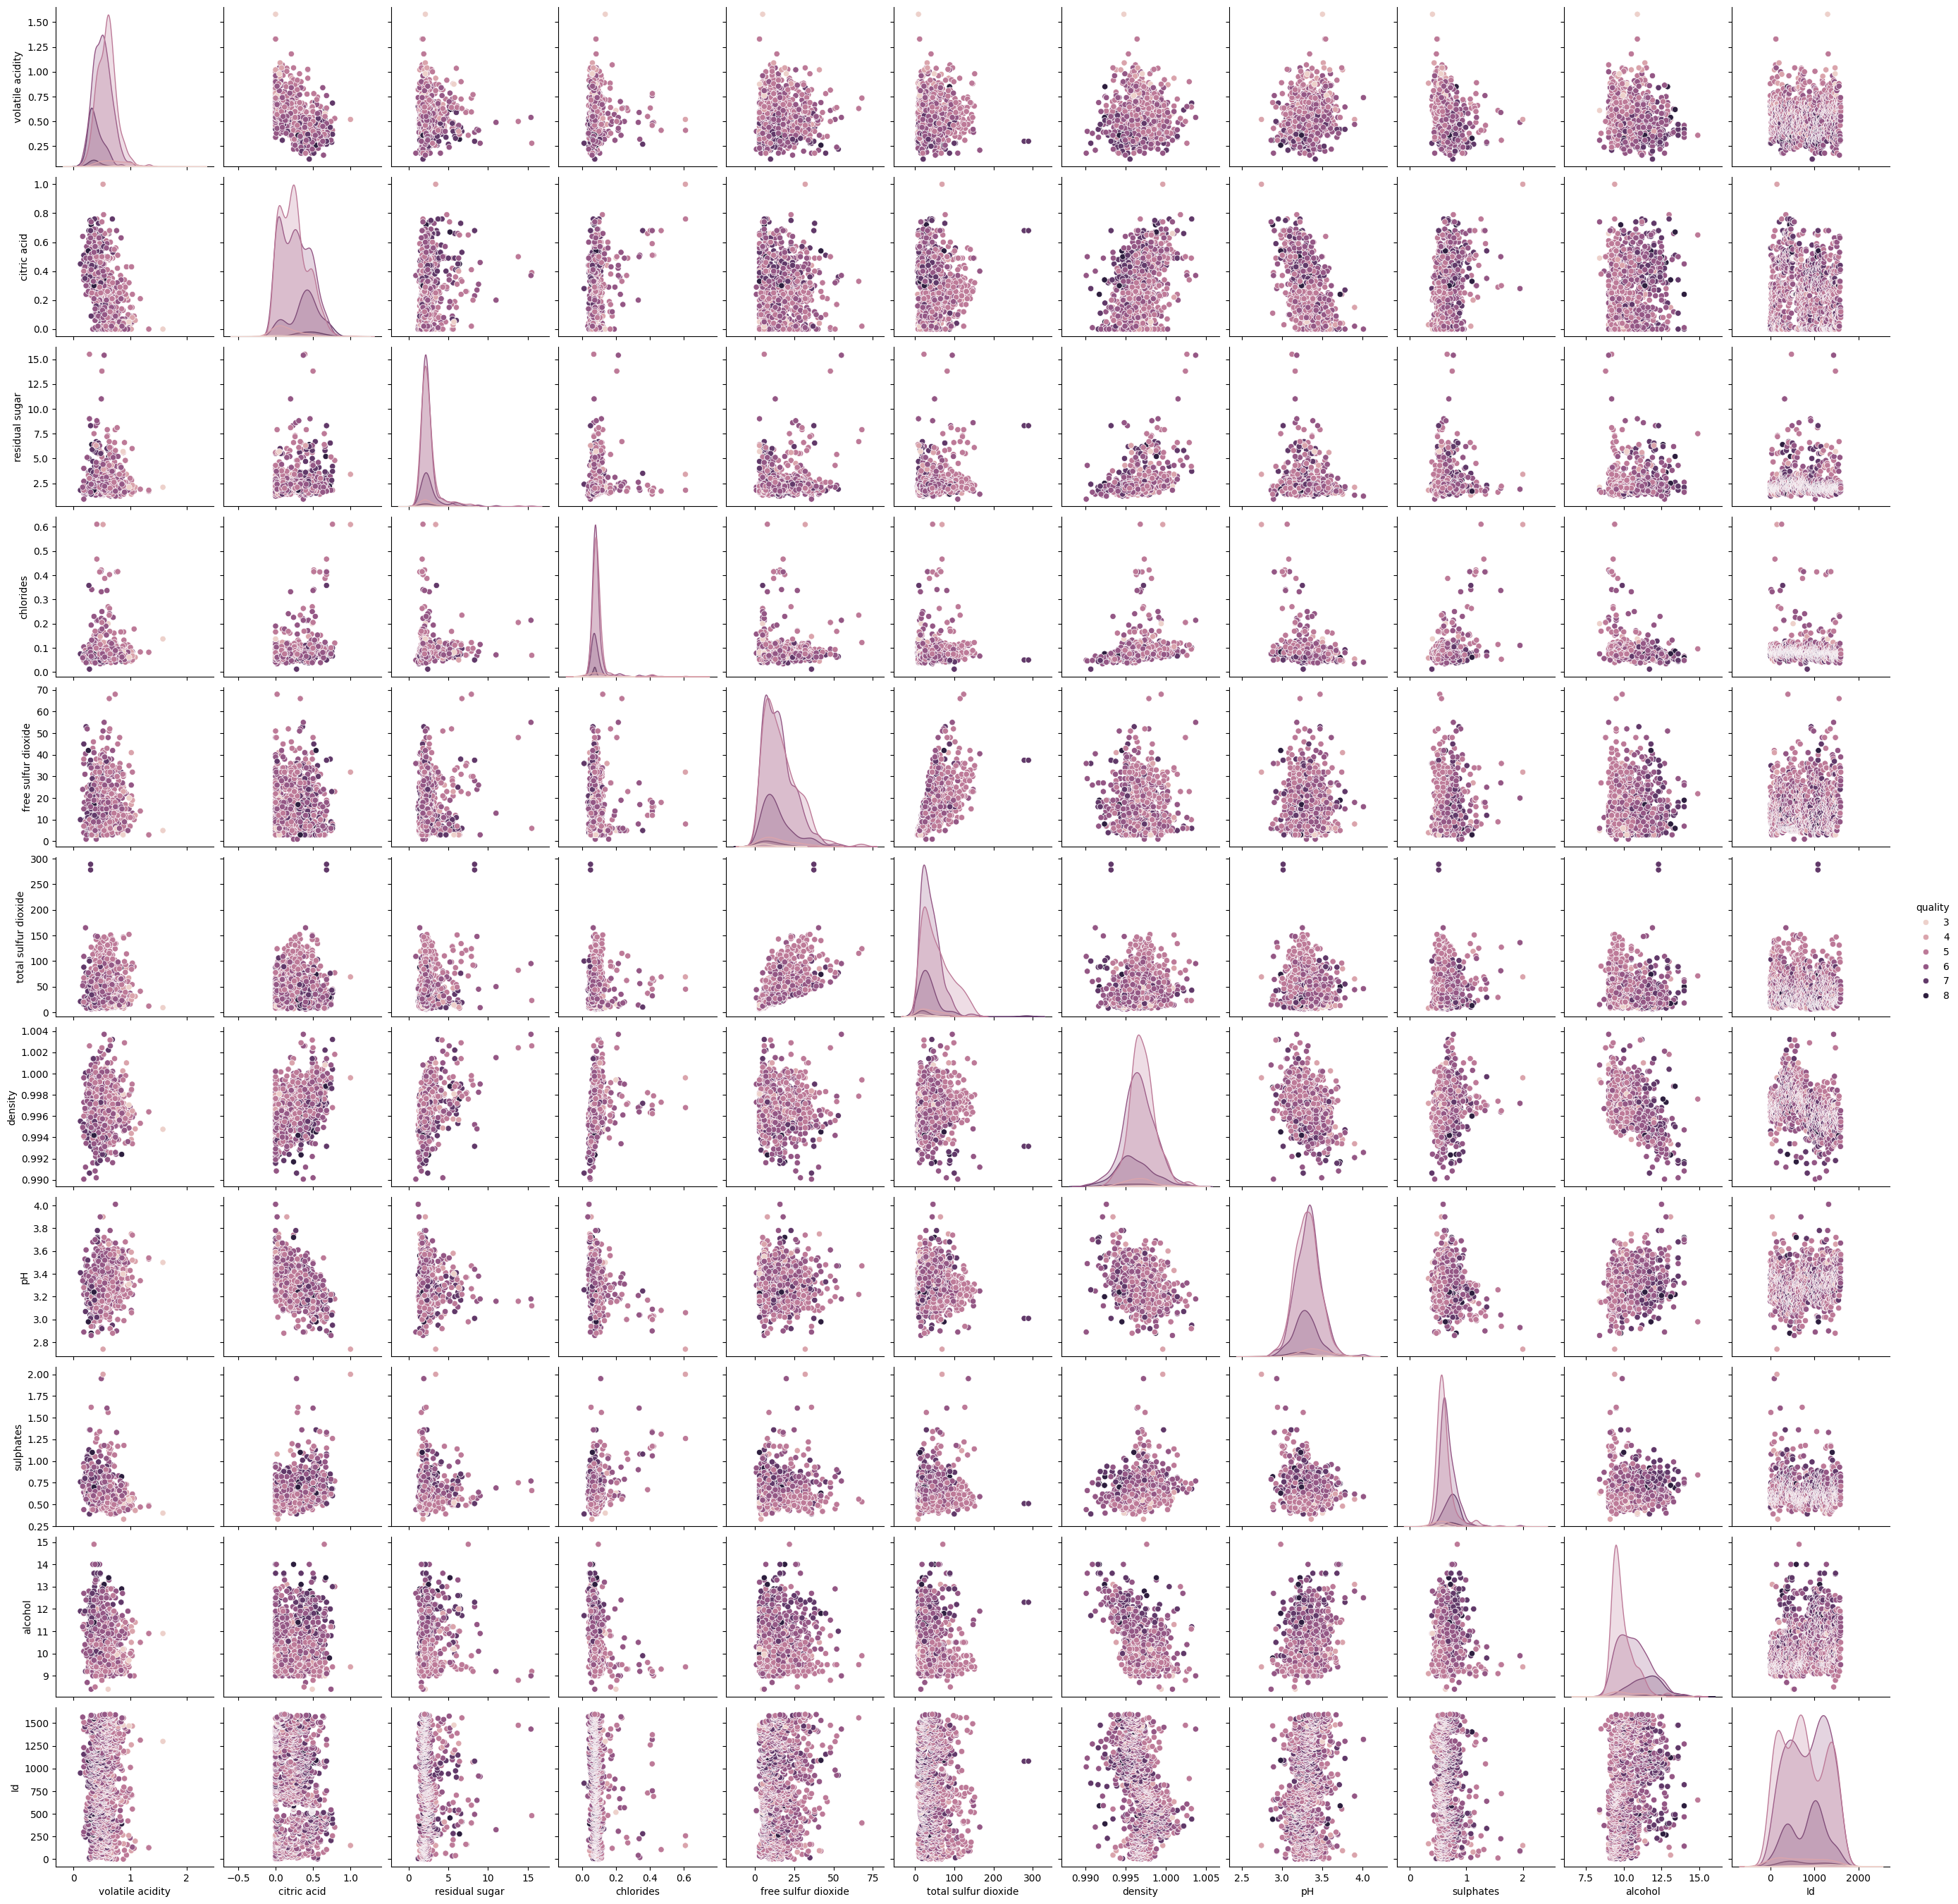

In [ ]:
import seaborn as sns

df = pd.DataFrame(data, columns=data.columns[1:12])
sns.pairplot(df,hue='quality')

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['Glucose','BMI']]
X_train, X_test, y_train, y_test = train_test_split(x,df['Outcome'],test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)
sum(pred1)

63

In [ ]:
from sklearn.ensemble import RandomForestClassifier
sv = RandomForestClassifier(max_depth=1, random_state=0)
sv.fit(X_train,y_train)
pred2 = sv.predict(X_test)
sum(pred2)

36

In [ ]:
model1 = np.array(pred1)
model2 = np.array(pred2)
df1 = pd.DataFrame(model1)
df2 = pd.DataFrame(model2)
pd.concat([df1, df2], axis=1).to_csv('Performance11.csv', header=['Model1', 'Model2'])

In [ ]:
from scipy.stats import ttest_ind

perform_data = pd.read_csv("Performance11.csv")

model1 = perform_data[["Model1"]]
model2 = perform_data[["Model2"]]
# Perform t-test
t_statistic, p_value = ttest_ind(model1, model2)

# Print results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: [3.08618533]
P-value: [0.00214977]


In [ ]:
import pandas as pd
from statsmodels.stats.weightstats import ztest
perform_data = pd.read_csv("Performance11.csv")

model1 = perform_data["Model1"]
model2 = perform_data["Model2"]

# Perform z-test
z_statistic, p_value = ztest(model1, model2)

# Print results
print(f'Z-statistic: {z_statistic}')
print(f'P-value: {p_value}')

Z-statistic: 3.086185327763162
P-value: 0.002027424134128005


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the accuracy of Model A and Model B.")
    if z_statistic>0:
      print("Model 1 is better than Model 2")
    else:
      print("Model 2 is better than Model 1")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the accuracy of Model A and Model B.")

Reject the null hypothesis.
There is a significant difference in the accuracy of Model A and Model B.
Model 1 is better than Model 2
